In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

import scipy.stats

In [2]:
df = pd.read_csv(r'C:\Users\ams-duongn.EXPEDITORS\Desktop\learn\Data Science Master\M5W3\books.csv', error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
# "publication_date" may be valuable for distribution analysis, especially when years and months will be extracted.
df['year'] = df.publication_date.str.rsplit("/", n=3, expand=True)[2].astype(int)
# n=3 because value is splitted into 3 parts: day, month and year
# [2] because we are interested only in 'year'

df['month'] = df.publication_date.str.rsplit("/", n=3, expand=True)[1].astype(int)
# similarly for month

#To avoid data leakage "publication_date" will be removed.
df = df.drop(['publication_date'], axis=1)

df.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,year,month
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,Scholastic Inc.,2006,16
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,Scholastic Inc.,2004,1


**1)  Perform a descriptive analysis of numerical features (mean, variance, median)**

In [5]:
df.describe(include='all')

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,year,month
count,11123.000000,11123,11123,11123.000000,11123,1.112300e+04,11123,11123.000000,1.112300e+04,11123.000000,11123,11123.000000,11123.000000
unique,NaN,10348,6639,NaN,11123,NaN,27,NaN,NaN,NaN,2290,NaN,NaN
top,NaN,The Brothers Karamazov,P.G. Wodehouse,NaN,0192836773,NaN,eng,NaN,NaN,NaN,Vintage,NaN,NaN
freq,NaN,9,40,NaN,1,NaN,8908,NaN,NaN,NaN,318,NaN,NaN
mean,21310.856963,NaN,NaN,3.934075,NaN,9.759880e+12,NaN,336.405556,1.794285e+04,542.048099,NaN,2000.169019,11.262249
std,13094.727252,NaN,NaN,0.350485,NaN,4.429758e+11,NaN,241.152626,1.124992e+05,2576.619589,NaN,8.247227,10.283108
min,1.000000,NaN,NaN,0.000000,NaN,8.987060e+09,NaN,0.000000,0.000000e+00,0.000000,NaN,1900.000000,1.000000
25%,10277.500000,NaN,NaN,3.770000,NaN,9.780345e+12,NaN,192.000000,1.040000e+02,9.000000,NaN,1998.000000,1.000000
50%,20287.000000,NaN,NaN,3.960000,NaN,9.780582e+12,NaN,299.000000,7.450000e+02,47.000000,NaN,2003.000000,8.000000
75%,32104.500000,NaN,NaN,4.140000,NaN,9.780872e+12,NaN,416.000000,5.000500e+03,238.000000,NaN,2005.000000,20.000000


Above is the standard descriptive analysis of numerical features on this dataset, including both numerical (mean, variance, standard deviation, median, quartiles) and categorical types (nuumber of unique values, mode, frequency)

**2)  What distribution do you think the ''average_rating" has? Plot it using a graph of your choice and motivate your choice.**

First I would like to know the mean, max and min value of this column

In [6]:
print('The average value of the rating is %.2f, the highest and lowest values are %d and %d respectively.' %(df.average_rating.mean(),df.average_rating.max(),df.average_rating.min()))

The average value of the rating is 3.93, the highest and lowest values are 5 and 0 respectively.


I decide to use the distribution plot from seaborn to represent this data graphically since this will have both the density line and histogram within the plot which will shows how the data points lie within the range of min and max value of this data. I also added the rug to represent each data points better.

c:\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\programs\python\python37\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Average rating')

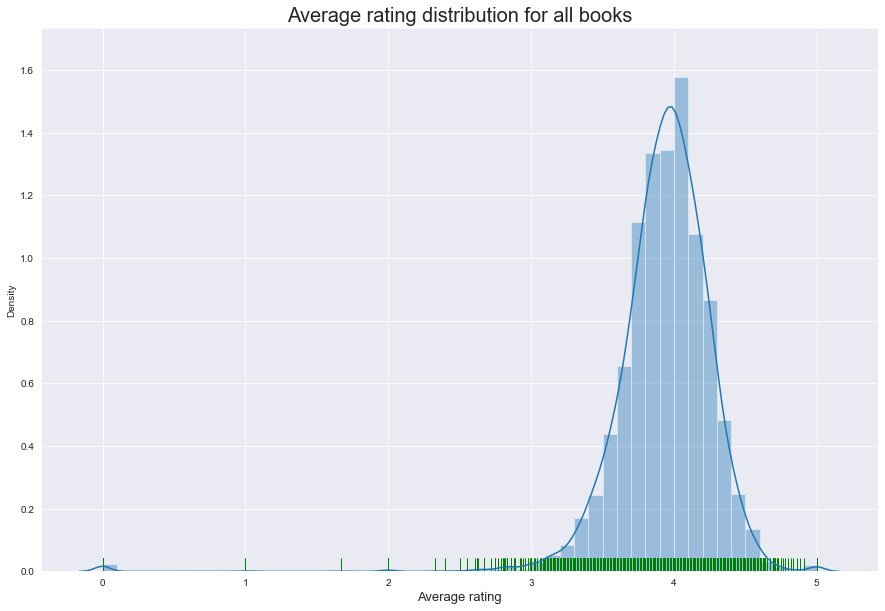

In [7]:
df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'],rug_kws={"color":"green"},rug=True,ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

From this distribution plot (histogramand and kde), we can see that the median of average_rating column is around 4 points. The highest score is 5 points. The graphical kde lines resemble a normal distribution, but the tails and skewness of background histogram doesnt fully prove that it is a true normal type. Hence, I go ahead and use the box plot to see the distribution of outliers.

c:\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


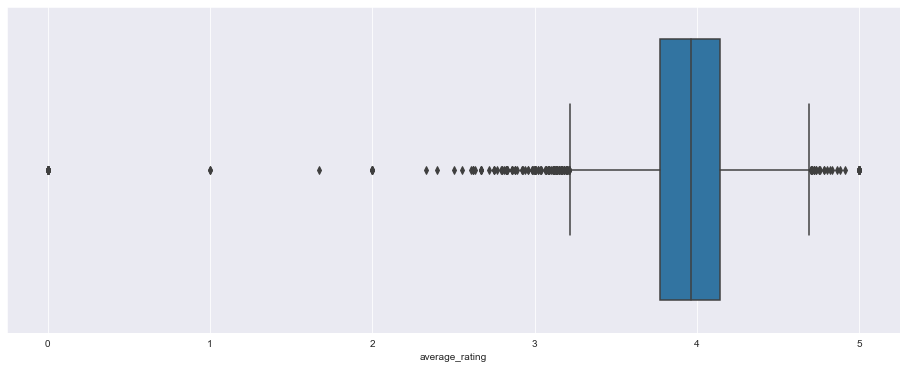

In [8]:
plt.figure(figsize=(16,6))
sns.boxplot(df.average_rating)

As you can see from this box plot, this average_rating distribution is left-skewed with outliers on both tails. However, the box itself is quite symmetrical.

Normal distribution parameters check

Parameters that are indicative for normal distribution are:

- mean
- median
- kurtosis
- skewness

The mean and median should have the same value, and kurtosis and skewness be equal to 0. (source: https://en.wikipedia.org/wiki/Normal_distribution)

In [9]:
df.agg(['mean', 'median', 'kurtosis', 'skew']).T

,mean,median,kurtosis,skew
bookID,2.131086e+04,2.028700e+04,-1.146588,0.144010
average_rating,3.934075e+00,3.960000e+00,36.222806,-3.577441
isbn13,9.759880e+12,9.780582e+12,442.473753,-21.066476
num_pages,3.364056e+02,2.990000e+02,62.415973,4.271778
ratings_count,1.794285e+04,7.450000e+02,442.271674,17.693952
text_reviews_count,5.420481e+02,4.700000e+01,396.565060,16.175096
year,2.000169e+03,2.003000e+03,16.259456,-2.992627
month,1.126225e+01,8.000000e+00,-1.153475,0.549317


Mean and median have similar values for:

- average_rating (left-skewed distribution)
- num_pages (right-skewed distribution)
- language_code (right-skewed distribution)
- year (with a skew that is the closest to 0, left-skewed distribution)

The "year" and "average_rating" are our front-runners in the race for normal distribution.

Hypothesis testing for average_rating data whether it is a normal distribution.

In [10]:
results = []
p_value_list = []
alpha = 0.05

for i in df._get_numeric_data().columns:
    p_value = scipy.stats.normaltest(df[i])[1] # to get only p_value without a statistic
    p_value_list.append(p_value)
    if p_value < alpha:
        results.append('rejected')
    else:
        results.append('not rejected')
        
pd.DataFrame(data={'variable': df._get_numeric_data().columns,
                    'p_value': p_value_list,
                    'null hypothesis': results})

,variable,p_value,null hypothesis
0,bookID,0.0,rejected
1,average_rating,0.0,rejected
2,isbn13,0.0,rejected
3,num_pages,0.0,rejected
4,ratings_count,0.0,rejected
5,text_reviews_count,0.0,rejected
6,year,0.0,rejected
7,month,0.0,rejected


According to hypothesis testing, none of variables comes from a normal distribution. Since all p value are 0, it is statistically confident to conclude that the average_rating data column is not a normal distribution type.

**3)  Plot a correlation matrix of the features. What conclusions can you draw from the correlation matrix?**

First I use the heatmap with auto correlation feature from pandas library to have an overall idea of how strong these features related to each other, with the range from 0-weakest to 1-identical

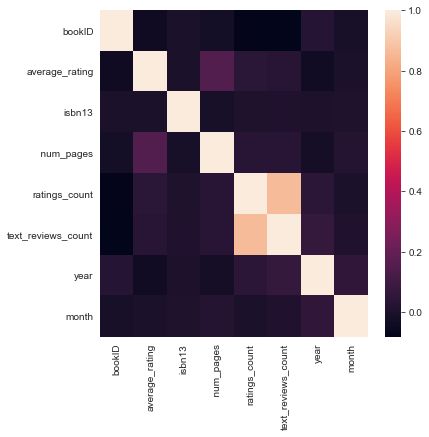

In [11]:
corrArray = df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corrArray)

From the chart above, we can conclude that most of these features are weakly correlated which conforms to our expectations as there are only a few correlations are meaningful in this case. Except for the one pair: rating_counts and text_reviews_count and can be considered to be of significant importance according to how to interpret Pearson Correlation Coefficient (source: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

<Figure size 1152x1152 with 0 Axes>

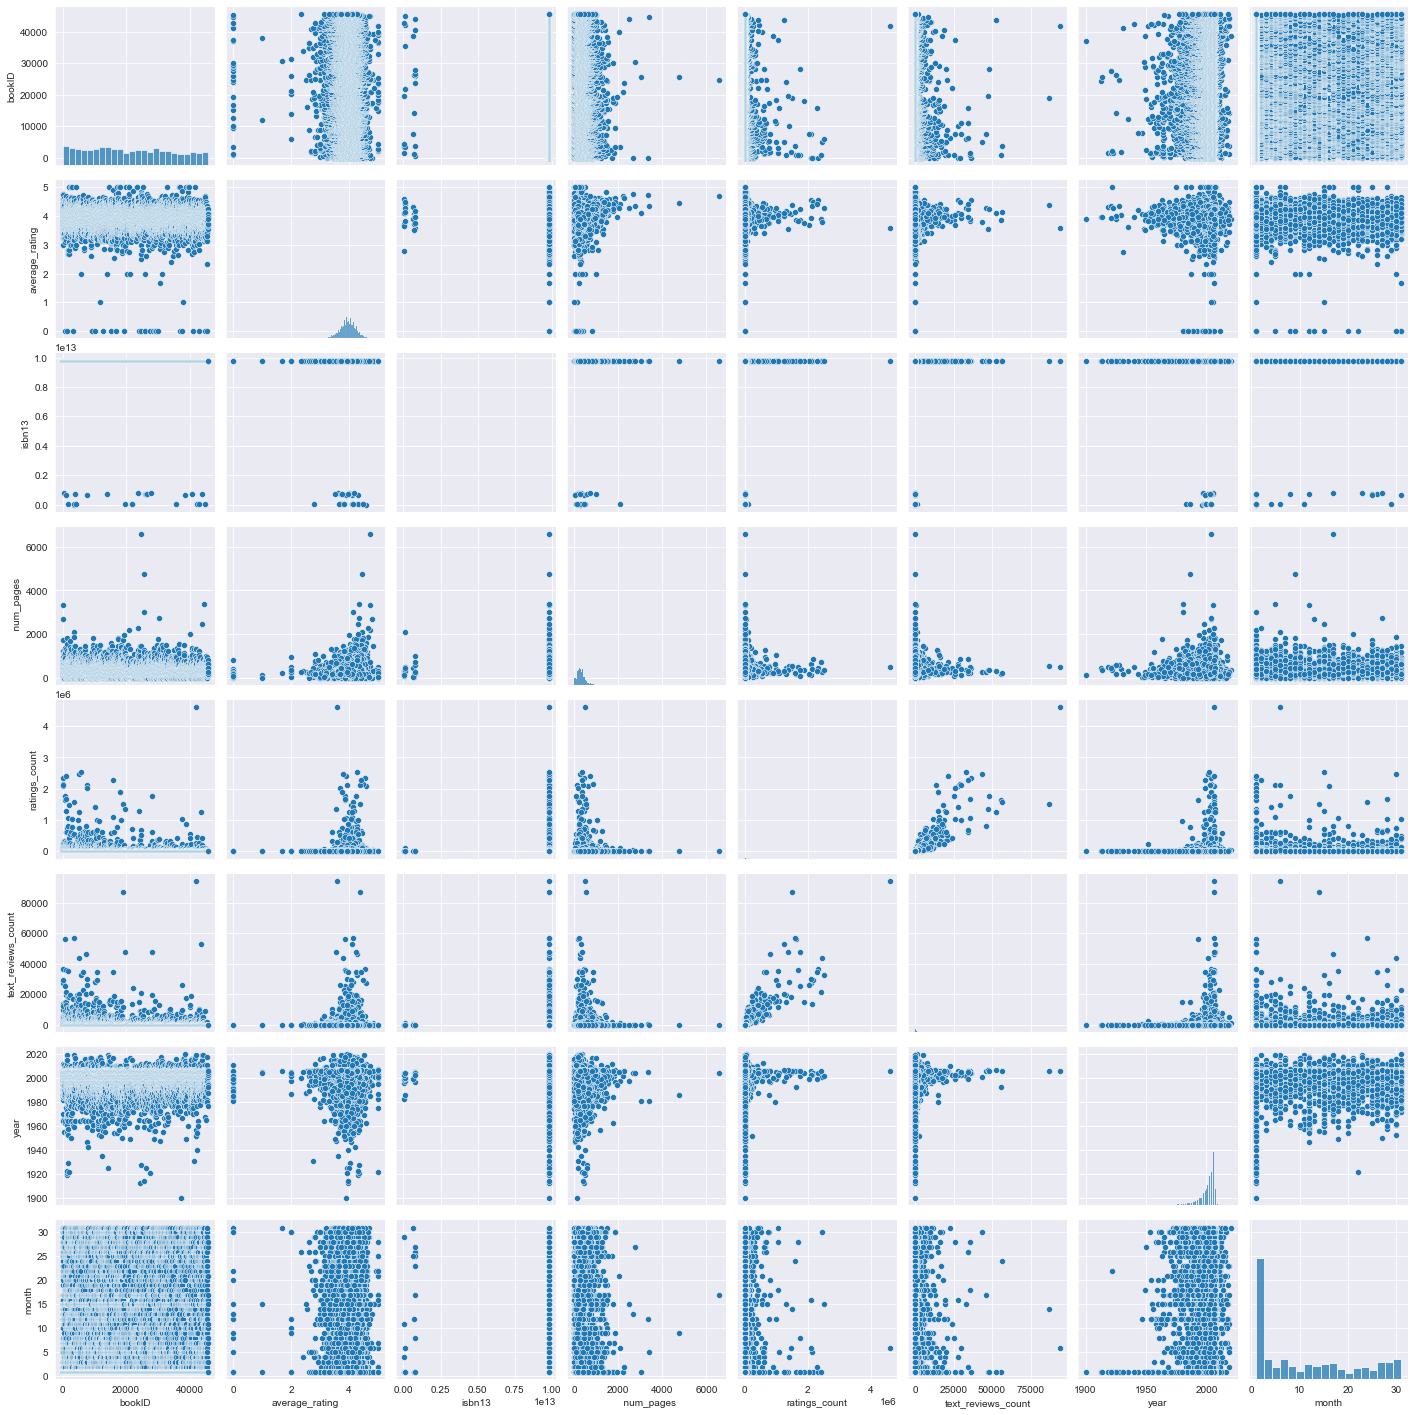

In [12]:
plt.figure(figsize=(16,16))
sns.pairplot(df)

From the paired-plots shown above, we can once again confirm the linear relationship between these two variables: rating_counts and text_reviews_count. Henceforth, we can also conclude from the positive upward trend, the book with more text_reviews will normally have a higher number of ratings on Good Reads.